# 1 Stratification of the solar atmosphere

## 1.1 FALC temperature stratification

**Figure 2 shows the FALC temperature stratification. It was made with IDL code similar to the following. Write similar code and make it work.**

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import astropy.constants as const

#use the pretty LaTeX fonts
mpl.rcParams.update({'text.usetex': True})
plt.rc('font', family='serif', size=10)
mpl.rc('axes.formatter', useoffset=False)

# plt.style.use('ggplot')

In [2]:
k = const.k_B.cgs.value

In [3]:
!head falc.dat

FALC solar model atmosphere of Fontenla, Avrett & Loeser 1993ApJ...406..319F; 82 heights top-to-bottom
 height   tau_500    colmass    temp    v_turb n_Htotal   n_proton   n_electron pressure  p_gas/p  density
 [km]     dimless    [g/cm^2]   [K]     [km/s] [cm^-3]    [cm^-3]    [cm^-3]    [dyn/cm2] ratio    [g/cm^3]
 
 2218.20  0.000E+00  6.777E-06  100000  11.73  5.575E+09  5.575E+09  6.665E+09  1.857E-01  0.952  1.306E-14
 2216.50  7.696E-10  6.779E-06   95600  11.65  5.838E+09  5.837E+09  6.947E+09  1.857E-01  0.950  1.368E-14
 2214.89  1.531E-09  6.781E-06   90816  11.56  6.151E+09  6.150E+09  7.284E+09  1.858E-01  0.948  1.441E-14
 2212.77  2.597E-09  6.785E-06   83891  11.42  6.668E+09  6.667E+09  7.834E+09  1.859E-01  0.945  1.562E-14
 2210.64  3.754E-09  6.788E-06   75934  11.25  7.381E+09  7.378E+09  8.576E+09  1.860E-01  0.941  1.729E-14
 2209.57  4.384E-09  6.790E-06   71336  11.14  7.864E+09  7.858E+09  9.076E+09  1.860E-01  0.938  1.843E-14


In [4]:
# read in the data
h, tau5, colm, temp, vturb, nhyd, nprot, nel, ptot, pgasptot, dens = np.loadtxt('falc.dat',skiprows=4, unpack=True)

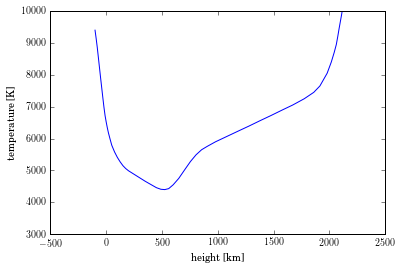

In [5]:
fig, ax = plt.subplots()
ax.plot(h,temp)
ax.set_ylim(3000,10000)
ax.set_xlabel('height [km]')
ax.set_ylabel('temperature [K]')
plt.show()

## 1.2 FALC density stratification

**Plot the total pressure $p_{total}$ against the column mass $m$, both linearly and logarithmically. You will find that they scale linearly. Exlpain what assumption has caused $p_{total} = c m$ and determine the value of solar surface gravity $g = c$ that went into the FALC-producing code.**

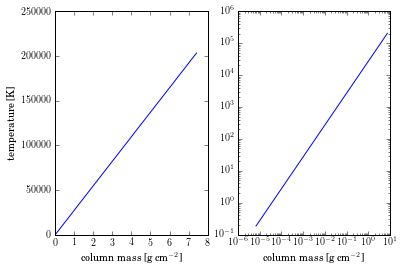

In [6]:
fig, ax = plt.subplots(ncols=2)

ax[0].plot(colm,ptot)
ax[0].set_xlabel('column mass [g cm$^{-2}$]')
ax[0].set_ylabel('temperature [K]')

ax[1].loglog(colm,ptot)
ax[1].set_xlabel('column mass [g cm$^{-2}$]')

plt.show()

We assumed hydrostatic equilibrium and that column mass $m$ is independent of R?????

**Fontenla et al (1993) also assumed complete mixing, i.e., the same element mix at all heights. Check this by plotting the ratio of the hydrogen mass density to the total mass density against height. Then add helium to hydrogen using their abundance and mass ratios ($N_{He}/N_{H} = 0.1, m_{He} = 3.97 m_{H}$), estimate the fraction of the total mass density made up by the remaining elements in the model mix ("the metals").**

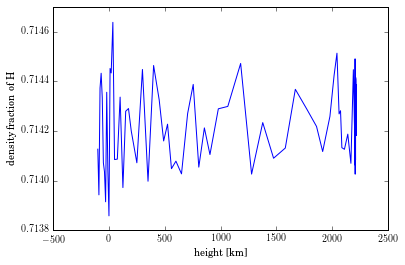

In [7]:
mh = 1.67352e-24 # mass of hydroen [g]
H_ratio = nhyd*mh / dens
fig, ax = plt.subplots()
ax.plot(h,H_ratio, label='H')
ax.set_ylabel('density fraction of H')
ax.set_xlabel('height [km]')

plt.show()



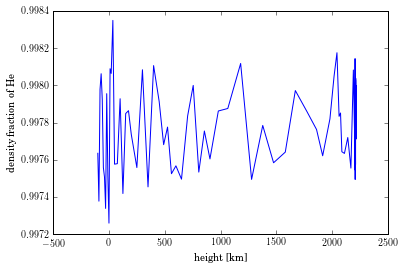

In [8]:
fig, ax = plt.subplots()
HHe_ratio = (nhyd*mh + 0.1*nhyd*3.97*mh) / dens
ax.plot(h, HHe_ratio)
ax.set_ylabel('density fraction of He')
ax.set_xlabel('height [km]')
plt.show()


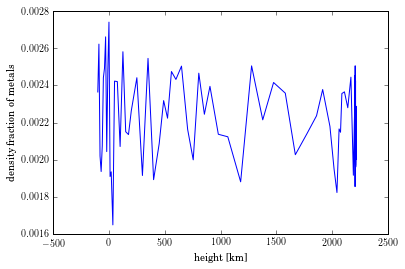

In [9]:
fig, ax = plt.subplots()
metal_ratio = 1 - (nhyd*mh + 0.1*nhyd*3.97*mh)/dens
ax.plot(h, metal_ratio)
ax.set_ylabel('density fraction of metals')
ax.set_xlabel('height [km]')
plt.show()

In [10]:
print(r"average metal fraction is ~ {:.2}".format((1 - HHe_ratio).mean()))

average metal fraction is ~ 0.0022


**Plot the column mass against height. The curve becomes nearly straight when you make the $y$-axis logarithmic. Why is that? Why isn't it exactly straight?**

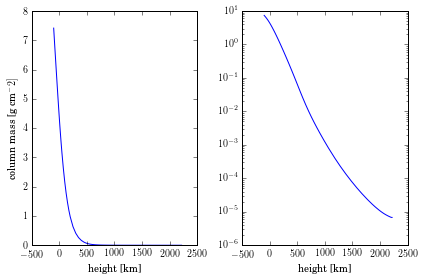

In [12]:
fig, ax = plt.subplots(ncols=2)

ax[0].plot(h, colm)
ax[0].set_xlabel('height [km]')
ax[0].set_ylabel('column mass [g cm^-2]')

ax[1].semilogy(h, colm)
ax[1].set_xlabel('height [km]')
fig.tight_layout()
plt.show()

???????

**Plot the gas density against height. Estimate the density scale height $H_{\rho}$ in $\rho \approx \rho(0)exp(-h/H_{\rho})$ in the photosphere.**

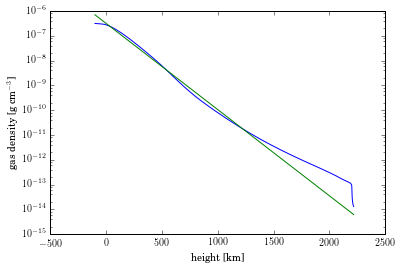

In [13]:
def rho(h, rho0, H):
    return rho0*np.exp(-h/H)

plt.semilogy(h, dens)
plt.semilogy(h, rho(h, dens[79], 125))
plt.ylabel('gas density [g cm$^{-3}$]')
plt.xlabel('height [km]')
plt.show()

scale height $H_{\rho} = $??????

**Compute the gas pressure and plot it against height. Overplot the product $(nH+ne)kT$. Plot the ratio of the two curves to show their differences. Do the differences measure deviations from the ideal gas law or something else? Now add the helium density NHe to the product and enlarge the deviations. Comments?**

The gas pressure is $ P_{gas} = P_{tot} - \rho v_{t}^2/2 $

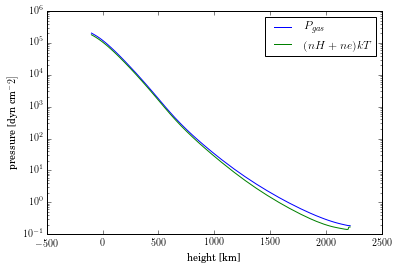

In [15]:
pgas = ptot - dens*vturb**2/2
plt.semilogy(h, pgas, label=r'$P_{gas}$')
plt.semilogy(h, (nhyd+nel)*k*temp, label = r'$(nH+ne)kT$' )
plt.xlabel('height [km]')
plt.ylabel('pressure [dyn cm^-2]')

plt.legend()
plt.show()

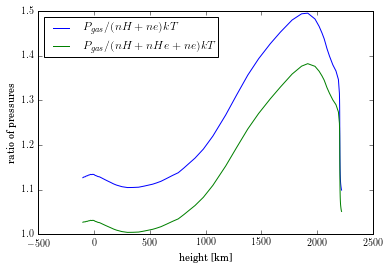

In [16]:
p2 = (nhyd+nel)*k*temp
p3 = (nhyd+nel+0.1*nhyd)*k*temp
plt.plot(h, pgas/p2, label=r'$P_{gas}/(nH+ne)kT$')
plt.plot(h, pgas/p3, label=r'$P_{gas}/(nH+nHe+ne)kT$')
plt.xlabel('height [km]')
plt.ylabel('ratio of pressures')

plt.legend(loc='upper left')
plt.show()

**Do the differences measure deviations from the ideal gas law or something else?**

?????ADFasdfadsF????

**Plot the total hydrogen density against height and overplot curves for the electron density, the proton density, and the density of the electrons that do not result from hydrogen ionization. Explain their behavior. You may find inspiration in Figure 6 on page 13. The last curve is parallel to the hydrogen density over a considerable height range. What does that imply? And what happens at larger height?**

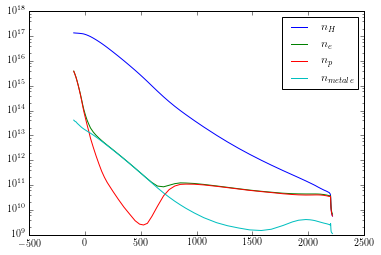

In [17]:
plt.semilogy(h, nhyd, label=r'$n_H$')
plt.semilogy(h, nel, label=r'$n_e$')
plt.semilogy(h, nprot, label=r'$n_p$')
n_metal = nel - nprot
plt.semilogy(h, n_metal, label=r'$n_{metal e}$')
plt.legend()
plt.show()

The $n_p$ traces the temperature as it decreases then inverts. As temperature decreases until the inversion, $n_e$ is due to the electrons coming from ionized metals. At the inversion, more H becomes ionized and this becomes the dominant electron source. The density of electrons due to metal ionization paralles the density of hydrogren since ??? 

**Plot the ionization fraction of hydrogen logarithmically against height. Why does this curve look like the one in Figure 2? And why is it tilted with respect to that?**


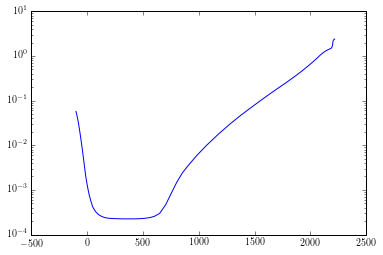

In [31]:
N = nprot + nel + n_metal
plt.semilogy(h, N/nhyd, label=r'$n_H$')
plt.show()

????????

** Let us now compare the photon and particle densities. In thermodynamic equilibrium (TE) the radia- tion is isotropic with intensity Iν = Bν and has total energy density (Stefan Boltzmann)**

$$u = \frac{1}{c} \iint B_{\nu}d\Omega d\nu = \frac{4\sigma}{c} T^4 $$

**so that the total photon density for isotropic TE radiation is given, with uν = du/dν, T in K and Nphot
  in photons per cm$^3d$, by**


$$ N = \int_{0}^{\infty} \frac{u_{\nu}}{h\nu}d\nu \approx 20T^3 $$

**This equation gives a reasonable estimate for the photon density at the deepest model location, why?**

assuming LTE??????

**Compute the value there and compare it to the hydrogen density.**

dfasdfasdf;kladsjflk;dsjaflk;sdajf??????????????????


**Why is the equation not valid higher upintheatmosphere?**
It is not valid higher up in the atmosphere because the density is low enough that we are in NLTE. ????


**The photon density there is $N_{phot} \approx 20T_{eff}^3/2\pi$ with $T_{eff} = 5770$K the effective solar temperature (since $\pi B(T_{eff}) = \sigma T_{eff}^3 = \mathscr{F}^+ = \pi \overline{I^{+}}$ with $\mathscr{F}^+$ the emergeng flux and $\overline{I^{+}}$ the disk averaged emergent intensity). Compare it to the hydrogen density at the highest location in the FALC model. The medium there is insensitive to these photons (except those at the center wavelength of the hydrogen Ly$\alpha$ line), why?**

a;lsdkfjdsal;kfjlkds;afj???????????????????

## 1.3 Comparison with the earth’s atmosphere

**Write IDL code to read file earth.dat.**

In [32]:
!head earth.dat


   0   6.01   288   -2.91   19.41
   1   5.95   282   -2.95   19.36
   2   5.90   275   -3.00   19.31
   3   5.85   269   -3.04   19.28 
   4   5.79   262   -3.09   19.23
   5   5.73   256   -3.13   19.19
   6   5.67   249   -3.18   19.14

   8   5.55   236   -3.28   19.04


In [34]:
h, logP, T, logdens, logN = np.loadtxt('earth.dat', unpack=True)

**Plot the temperature, pressure, particle density and gas density against height, logarithmically where
appropriate.**

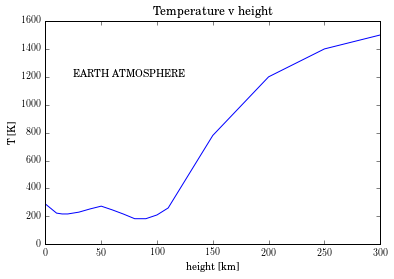

In [48]:
plt.plot(h, T)
plt.ylabel('T [K]')
plt.xlabel('height [km]')
plt.title('Temperature v height')
plt.text(25, 1200, 'EARTH ATMOSPHERE')
plt.show()

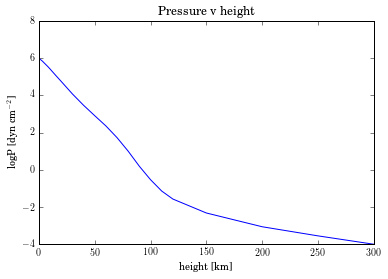

In [43]:
plt.plot(h, logP)
plt.ylabel('logP [dyn cm$^{-2}$]')
plt.title('Pressure v height')
plt.xlabel('height [km]')
plt.show()

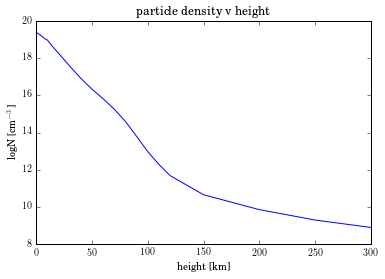

In [44]:
plt.plot(h, logN)
plt.ylabel('logN [cm$^{-3}$]')
plt.title('particle density v height')
plt.xlabel('height [km]')
plt.show()

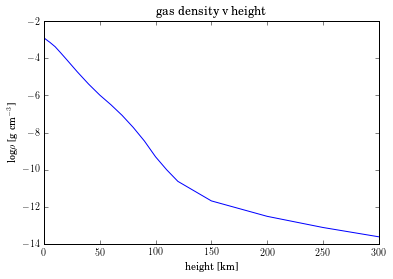

In [46]:
plt.plot(h, logdens)
plt.ylabel(r'log$\rho$ [g cm$^{-3}$]')
plt.title('gas density v height')
plt.xlabel('height [km]')
plt.show()

**Plot the pressure and density stratifications together in normalized units in one graph. Comments?**